<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(r"D:\Download\DataScience\Files\Week040923\housing.data", header=None, names=names, delim_whitespace=True)

In [4]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

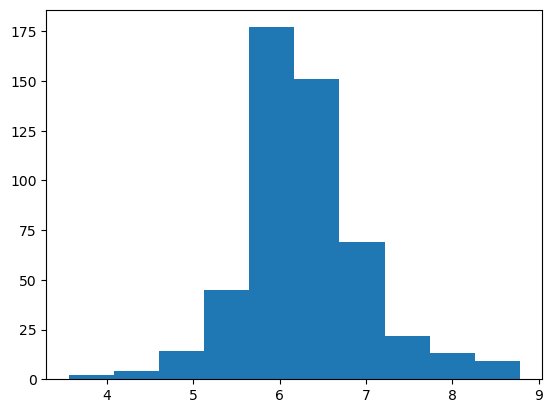

In [6]:
#  ANSWER
plt.hist(data['RM'])

##### 2. Plot Histogram of `MEDV`

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

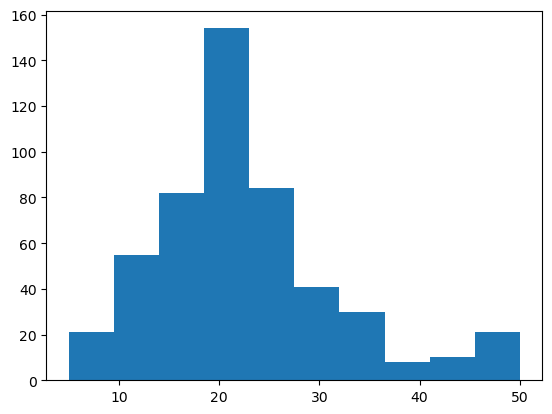

In [7]:
# ANSWER
plt.hist(data["MEDV"])

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

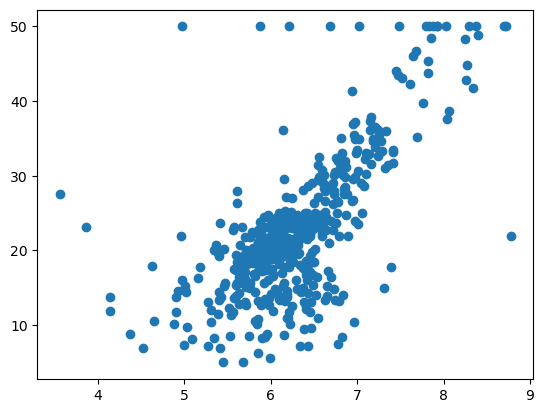

In [8]:
# ANSWER
plt.scatter(data['RM'], data['MEDV'])

##### 3.B Is there any trend? State your observation.

**ANSWER:**: There seems to be positive correlation between the two variables

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [9]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have less than 6 rooms.

Take sample of 100 houses in each dataset.

In [46]:
# ANSWER
Large_House = data[data['RM'] > 6].sample(100)['MEDV']
Small_House = data[data['RM'] < 6].sample(100)['MEDV']

In [47]:
Large_House

419     8.4
203    48.5
86     22.5
242    22.2
326    23.0
       ... 
498    21.2
10     15.0
83     22.9
369    50.0
272    24.4
Name: MEDV, Length: 100, dtype: float64

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

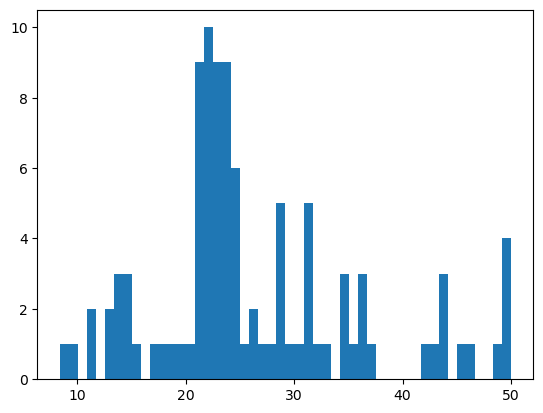

In [48]:
# ANSWER
plt.hist(Large_House, bins=50);

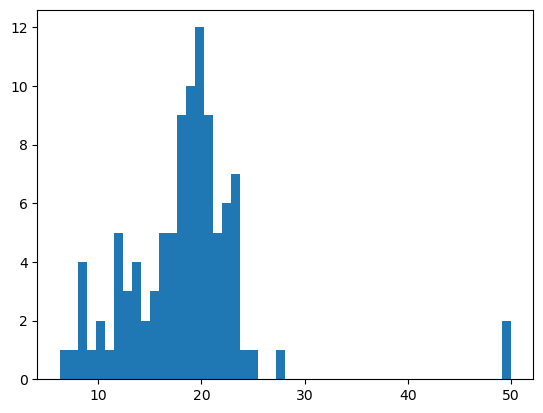

In [49]:
plt.hist(Small_House, bins=50);

##### 7. Calculate Variance

Calculate variance for both samples.

In [50]:
# ANSWER
Large_House_Var = np.var(Large_House)
Small_House_Var = np.var(Small_House)

print(Large_House_Var)
print(Small_House_Var)

91.30962399999999
39.48881899999999


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [51]:
# ANSWER
SP = np.sqrt((Large_House_Var + Small_House_Var)/2)
SP

8.086978514871916

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [52]:
# ANSWER
t = (Large_House.mean(axis=0) - Small_House.mean(axis=0)) / SP * np.sqrt(2/len(Large_House))
t

0.140197604194138

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [53]:
# ANSWER
degrees_of_freedom = (len(Large_House) + len(Small_House)) - 2
degrees_of_freedom

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [54]:
# ANSWER
p_value = 1 - stats.t.cdf(t, df=degrees_of_freedom)
p_value

0.4443231899697463

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [55]:
# ANSWER
def hypothesis_outcome(p_value):
    if p_value < alpha:
        print("null hypthesis rejected, p-value less than alpha")
    else:
        print("fail to reject null hypothesis, p-value greater than alpha")

In [56]:
# ANSWER
hypothesis_outcome(p_value)

fail to reject null hypothesis, p-value greater than alpha


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [57]:
# ANSWER
def calculate_t_p_value(sample1, sample2):
    t_statistic, _ = stats.ttest_ind(sample1, sample2)
    
    # Calculate the degrees of freedom
    df = len(sample1) + len(sample2) - 2  # Subtract 2 for the two samples
    
    # Calculate the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
    
    return t_statistic, p_value

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [58]:
# ANSWER
calculate_t_p_value(Large_House, Small_House)

(6.974742744280682, 4.4820369637932345e-11)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



